# Natural Language Processing

In this notebook we will be classifying the messages as spam or non-spam based on the contents of the messages.
Dataset: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection#

Good tutorials for NLP concepts can be found at:
1. http://www.nltk.org/book/
2. https://kaggle.com/c/word2vec-nlp-tutorial
3. https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

### Import of libraries

In [88]:
import nltk
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import sklearn

In [2]:
%matplotlib inline

In [3]:
sns.set_style('darkgrid')

In [4]:
# There are lot of 
# nltk.download_shell() # download stopwords using d option

### Data loading

In [5]:
DATA_DIR = os.path.join( os.curdir, '..', 'data')

In [6]:
spam_dataset = os.path.join(DATA_DIR, 'smsspamcollection', 'SMSSpamCollection')

In [7]:
if not os.path.exists(spam_dataset):
    print(f'dataset file not found at "{spam_dataset}"')
if not os.path.isfile(spam_dataset):
    print(f'dataset file "{spam_dataset}" is not a file')
else:
    print(f'dataset file available at "{spam_dataset}"')

dataset file available at "./../data/smsspamcollection/SMSSpamCollection"


In [8]:
messages = [line.strip() for line in open(spam_dataset)]

In [9]:
len(messages)

5574

In [10]:
for msg_num, msg in enumerate(messages[:10]):
    print(msg_num, msg, end='\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 

### Data import using Pandas

In [51]:
messages = pd.read_csv(spam_dataset, sep='\t', 
                       names=['label', 'message'])

In [52]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [53]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [54]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [55]:
messages['length'] = messages['message'].apply(len)

In [56]:
messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [57]:
messages.groupby('label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

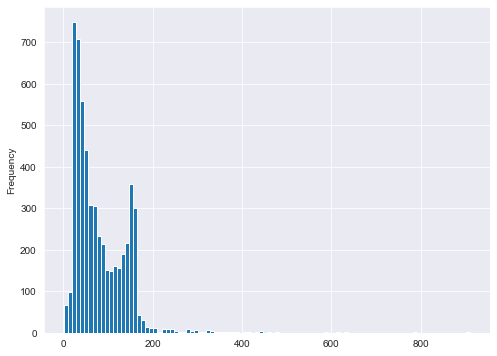

In [58]:
plt.figure(figsize=(8,6))
messages['length'].plot.hist(bins=100)

In [59]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [60]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [61]:
messages[messages['length']==2]['message'].iloc[0]

'Ok'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12d8e26a0>,
      dtype=object)

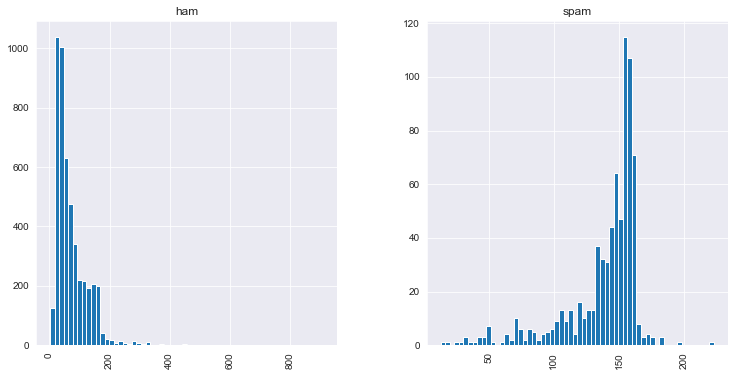

In [62]:
messages.hist(column='length', by='label', bins=60, figsize=(12,6))

In [63]:
# # How to remove punctutations
# sample_msg = 'Howdy! Modi... Welcome to Houston??'
# str_punc = string.punctuation
# filtered_txt = [c for c in sample_msg if c not in str_punc]
# filtered_txt = ''.join(filtered_txt)
# print(filtered_txt)

In [64]:
# # How to remove stopwords for the sentence
# from nltk.corpus import stopwords
# stopwords = stopwords.words('english')
# clean_sentence = [c for c in filtered_txt.split() if c.lower() not in stopwords]
# clean_sentence = " ".join(clean_sentence)
# print(clean_sentence)

In [65]:
# Method to remove punctuations and stop words
from nltk.corpus import stopwords
def process_message(msg=None):
    if not msg:
        return
    punction_free = "".join([char for char in msg if char not in string.punctuation])
    return [word.lower() for word in punction_free.split() if word.lower() not in stopwords.words('english')]

In [66]:
messages['message'].head(5).apply(process_message)

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
bow_transformer = CountVectorizer(analyzer=process_message).fit(messages['message'])

In [69]:
print(len(bow_transformer.vocabulary_))

9530


In [70]:
msg4 = messages['message'][3]

In [71]:
msg4

'U dun say so early hor... U c already then say...'

In [72]:
bow4 = bow_transformer.transform([msg4])

In [73]:
print(bow4)

  (0, 1129)	1
  (0, 1910)	1
  (0, 3002)	1
  (0, 3023)	1
  (0, 4219)	1
  (0, 7208)	2
  (0, 8626)	2


In [74]:
print(bow_transformer.get_feature_names()[1129])
print(bow_transformer.get_feature_names()[7208])
print(bow_transformer.get_feature_names()[8626])

already
say
u


In [75]:
message_bow = bow_transformer.transform(messages['message'])

In [76]:
print('Shape of sparse matrix: ', message_bow.shape)

Shape of sparse matrix:  (5572, 9530)


In [77]:
message_bow.nnz

50101

In [89]:
(message_bow.shape[0]*message_bow.shape[1])

53101160

In [79]:
sparsity = (message_bow.nnz *100)/(message_bow.shape[0]*message_bow.shape[1])

In [87]:
print(f'Sparsity Percentage: {sparsity}%')

Sparsity Percentage: 0.09435010459281869%


In [90]:
from sklearn.feature_extraction.text import TfidfTransformer

In [91]:
tfidf_transformer = TfidfTransformer().fit(message_bow)

In [92]:
tfidf4 = tfidf_transformer.transform(bow4)

In [93]:
print(tfidf4)

  (0, 8626)	0.31949158769666564
  (0, 7208)	0.5597000940482765
  (0, 4219)	0.46452762500729494
  (0, 3023)	0.33557436526898854
  (0, 3002)	0.30912546538910485
  (0, 1910)	0.2870370340589675
  (0, 1129)	0.27985004702413824


In [94]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.239394426449646

In [95]:
messages_tfidf = tfidf_transformer.transform(message_bow)

In [97]:
from sklearn.naive_bayes import MultinomialNB

In [98]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [101]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [102]:
messages['label'][3]

'ham'

In [104]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [105]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'],
                                                               messages['label'],
                                                               test_size=0.3)

In [108]:
msg_train.shape

(3900,)

In [111]:
label_train.describe()

count     3900
unique       2
top        ham
freq      3389
Name: label, dtype: object

In [109]:
msg_test.shape

(1672,)

In [112]:
from sklearn.pipeline import Pipeline

In [113]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=process_message)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [114]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function process_message at 0x12efd9840>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [115]:
predictions = pipeline.predict(msg_test)

In [116]:
from sklearn.metrics import classification_report, confusion_matrix

In [117]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1436
        spam       1.00      0.68      0.81       236

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672



In [118]:
print(confusion_matrix(label_test, predictions))

[[1436    0]
 [  75  161]]
